<a href="https://colab.research.google.com/github/vaibhav688/vaibhav/blob/main/CLIMATEPREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from textblob import TextBlob

In [3]:
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("/content/project 2 climate.csv")

df = df.dropna(subset=["text"])  # Drop missing text
df["commentsCount"] = df["commentsCount"].fillna(0)

df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.sort_values("date").reset_index(drop=True)

# ============================================================
# Step 4: Text Features
# ============================================================

df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))
df["char_length"] = df["text"].apply(lambda x: len(str(x)))


In [5]:
df

,date,likesCount,profileName,commentsCount,text,text_length,char_length
0,2020-09-15 21:25:05+00:00,27,e332cfd3f53d89cdd75a57b80d011e2f5984437cc51340...,6.0,I wish this was simply old news and we had peo...,33,167
1,2020-09-15 21:30:35+00:00,7,7d6065e313e1919d05a309bd59754895d9518d3ca8e8ba...,8.0,The sad thing is that if we look at projected ...,31,173
2,2020-09-15 21:32:15+00:00,4,930f8ce8e022378d44088377fef6a069da6c519c2e5ba1...,0.0,We all play a part....as a world we need to do...,12,57
3,2020-09-15 21:36:05+00:00,3,00febfebfa7073f73c576deb9dba73eb9f98e26bb03f3d...,7.0,Re ord being from 1860 something...lolol,6,40
4,2020-09-15 21:36:59+00:00,16,6c5e0b507471c121613153d3459e97b050dd47d1ec744c...,8.0,The climate is changing but it’s ridiculous to...,27,142
...,...,...,...,...,...,...,...
499,2023-12-17 16:43:53+00:00,3,282d2d15e6bbe6dafad6bb0e5f459c3a1e22d436032724...,0.0,And the denialists and conspiracists show up e...,9,56
500,2023-12-20 18:15:56+00:00,0,77dc9cf0368a7dc7fead0a3f63676f1d3e40fd28628bcd...,0.0,does the solar maximum affect \nthe earth's co...,18,93
501,2023-12-22 15:27:58+00:00,0,a631de9badfcf02361ebe244b5cdc894d9998bf590a7f8...,0.0,We forgot a huge informations about climatic c...,93,476
502,2023-12-24 07:26:22+00:00,0,a69f929cf97876f7eeea2aef2e38c0e6841a26d23706b3...,0.0,There is no time 🌤️,5,19


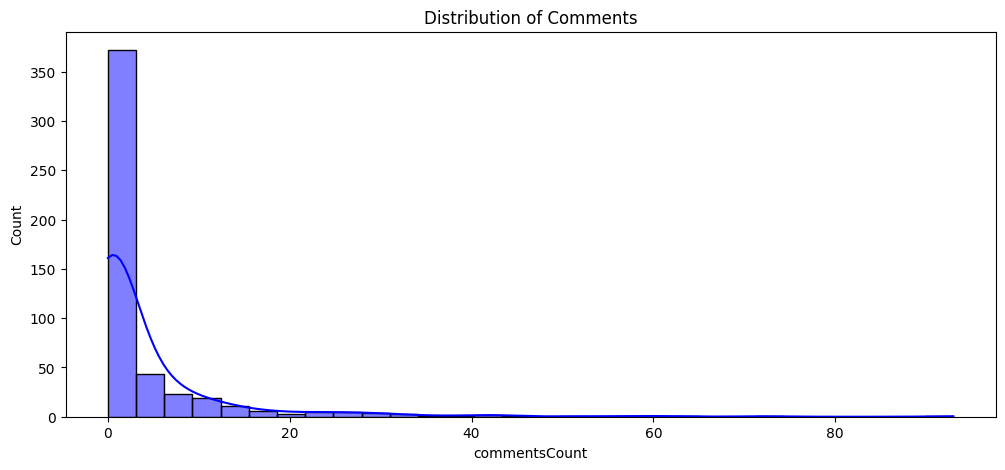

In [6]:
plt.figure(figsize=(12,5))
sns.histplot(df["commentsCount"], bins=30, color="blue", kde=True)
plt.title("Distribution of Comments")
plt.show()


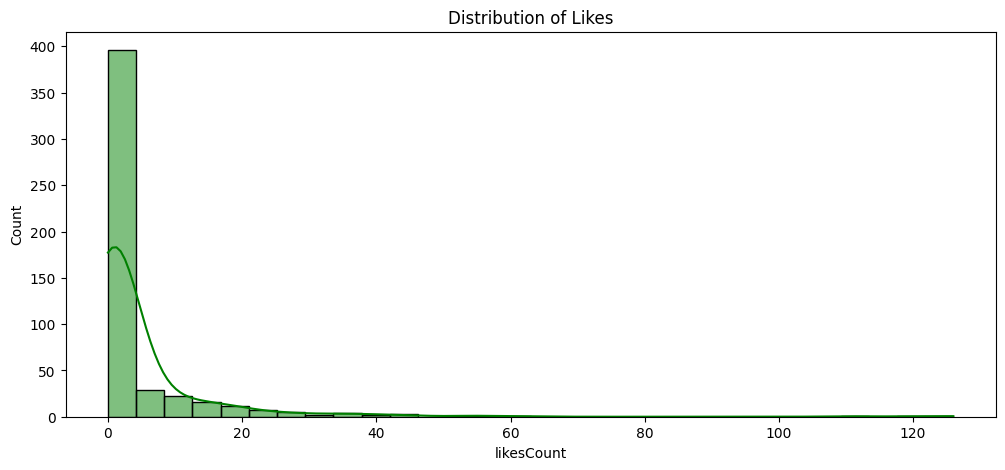

In [7]:
plt.figure(figsize=(12,5))
sns.histplot(df["likesCount"], bins=30, color="green", kde=True)
plt.title("Distribution of Likes")
plt.show()

In [8]:
df

,date,likesCount,profileName,commentsCount,text,text_length,char_length
0,2020-09-15 21:25:05+00:00,27,e332cfd3f53d89cdd75a57b80d011e2f5984437cc51340...,6.0,I wish this was simply old news and we had peo...,33,167
1,2020-09-15 21:30:35+00:00,7,7d6065e313e1919d05a309bd59754895d9518d3ca8e8ba...,8.0,The sad thing is that if we look at projected ...,31,173
2,2020-09-15 21:32:15+00:00,4,930f8ce8e022378d44088377fef6a069da6c519c2e5ba1...,0.0,We all play a part....as a world we need to do...,12,57
3,2020-09-15 21:36:05+00:00,3,00febfebfa7073f73c576deb9dba73eb9f98e26bb03f3d...,7.0,Re ord being from 1860 something...lolol,6,40
4,2020-09-15 21:36:59+00:00,16,6c5e0b507471c121613153d3459e97b050dd47d1ec744c...,8.0,The climate is changing but it’s ridiculous to...,27,142
...,...,...,...,...,...,...,...
499,2023-12-17 16:43:53+00:00,3,282d2d15e6bbe6dafad6bb0e5f459c3a1e22d436032724...,0.0,And the denialists and conspiracists show up e...,9,56
500,2023-12-20 18:15:56+00:00,0,77dc9cf0368a7dc7fead0a3f63676f1d3e40fd28628bcd...,0.0,does the solar maximum affect \nthe earth's co...,18,93
501,2023-12-22 15:27:58+00:00,0,a631de9badfcf02361ebe244b5cdc894d9998bf590a7f8...,0.0,We forgot a huge informations about climatic c...,93,476
502,2023-12-24 07:26:22+00:00,0,a69f929cf97876f7eeea2aef2e38c0e6841a26d23706b3...,0.0,There is no time 🌤️,5,19


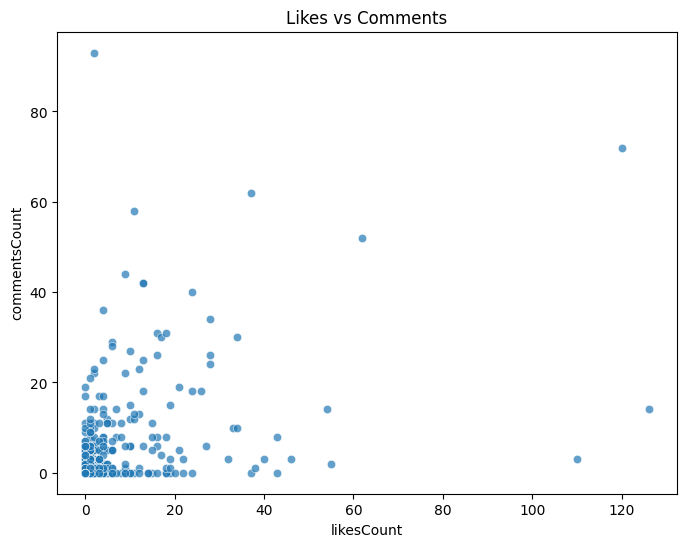

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="likesCount", y="commentsCount", data=df, alpha=0.7)
plt.title("Likes vs Comments")
plt.show()

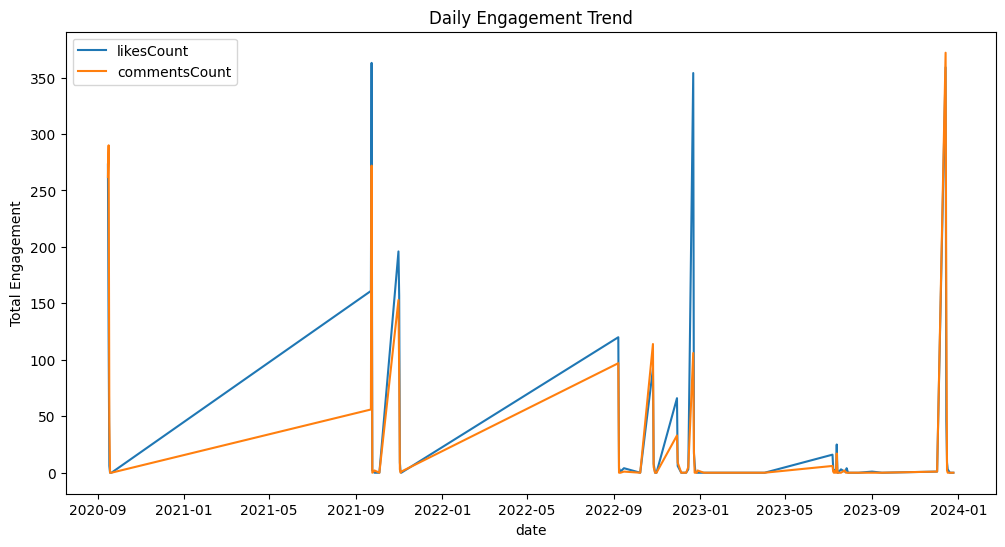

In [10]:
if "date" in df.columns and not df["date"].isnull().all():
    daily = df.groupby(df["date"].dt.date)[["likesCount", "commentsCount"]].sum()
    daily.plot(figsize=(12,6))
    plt.title("Daily Engagement Trend")
    plt.ylabel("Total Engagement")
    plt.show()
else:
    print("⚠️ No valid date column for trend analysis.")

/tmp/ipython-input-2144200979.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette="viridis")


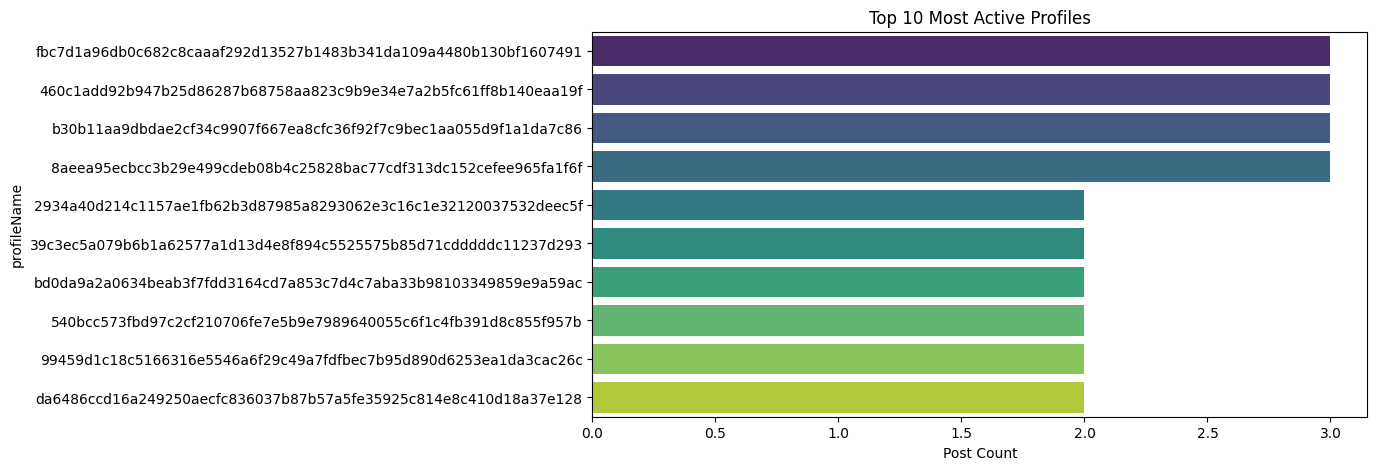

In [11]:
if "profileName" in df.columns:
    top_users = df["profileName"].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_users.values, y=top_users.index, palette="viridis")
    plt.title("Top 10 Most Active Profiles")
    plt.xlabel("Post Count")
    plt.show()

In [12]:
from wordcloud import WordCloud
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text

text_all = " ".join(df["text"].apply(clean_text))
wordcloud = WordCloud(width=1200, height=600, background_color="white", colormap="viridis").generate(text_all)

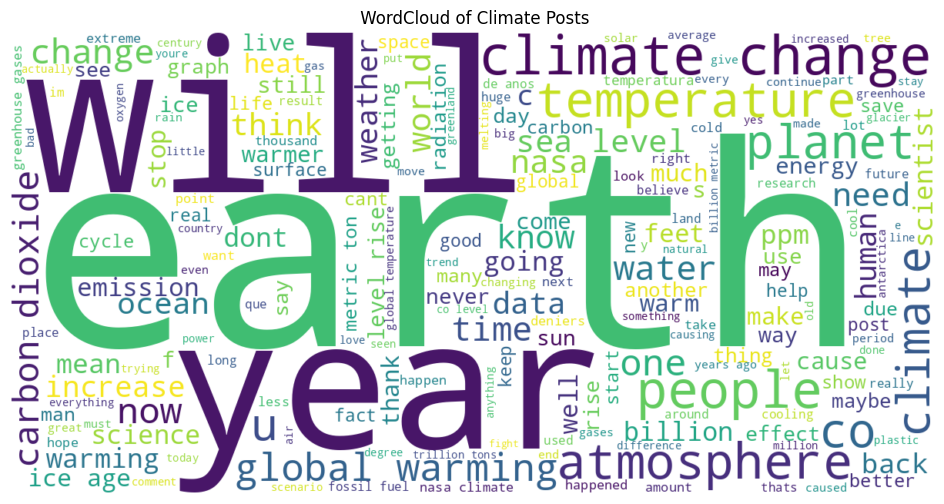

In [13]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(" WordCloud of Climate Posts")
plt.show()

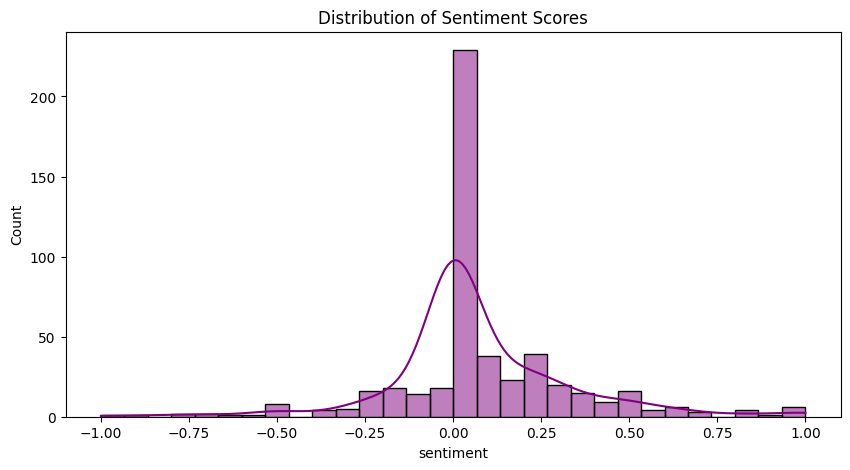

In [14]:
from textblob import TextBlob
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df["sentiment"] = df["text"].apply(lambda x: get_sentiment(str(x)))

plt.figure(figsize=(10,5))
sns.histplot(df["sentiment"], bins=30, kde=True, color="purple")
plt.title("Distribution of Sentiment Scores")
plt.show()

In [15]:
avg_sentiment = df["sentiment"].mean()
print(f" Average Sentiment Score: {avg_sentiment:.3f}")

 Average Sentiment Score: 0.073


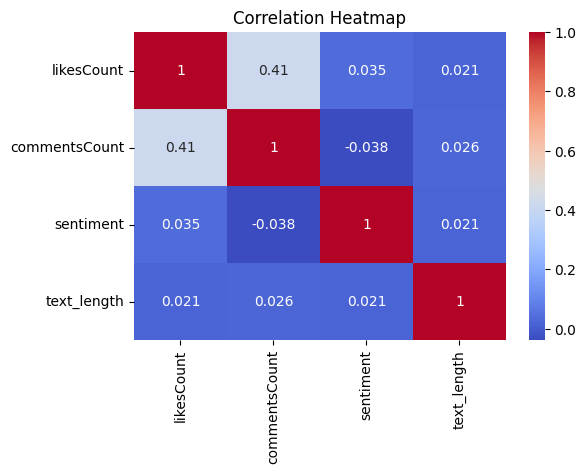

In [16]:
corr = df[["likesCount", "commentsCount", "sentiment", "text_length"]].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
print("\n EDA Summary:")
print(f"- Total posts analyzed: {len(df)}")
print(f"- Average likes: {df['likesCount'].mean():.2f}")
print(f"- Average comments: {df['commentsCount'].mean():.2f}")
print(f"- Average text length (words): {df['text_length'].mean():.2f}")
print(f"- Average sentiment: {avg_sentiment:.2f}")

if corr.loc["likesCount", "sentiment"] > 0:
    print(" Positive posts tend to get more likes.")
else:
    print(" No strong positive correlation between sentiment and likes.")


 EDA Summary:
- Total posts analyzed: 504
- Average likes: 4.87
- Average comments: 4.19
- Average text length (words): 32.23
- Average sentiment: 0.07
 Positive posts tend to get more likes.


In [18]:
target = "likesCount"  # You can also switch to "commentsCount"

# ============================================================
# Step 2: Prepare features
# ============================================================

df["sentiment"] = df["text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))

X = df[["text", "sentiment", "text_length"]]
y = df[target]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
text_transformer=Pipeline([('tfdif',TfidfVectorizer(max_features=3000, stop_words='english'))])

In [21]:
preprocessor = ColumnTransformer(transformers=[
    ('text', text_transformer, 'text'),
    ('num', StandardScaler(), ['sentiment', 'text_length'])
])


In [22]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])


In [23]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [24]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [25]:
r2

0.036493805432649795

In [26]:
mae

5.755045581650925

In [27]:
data=pd.read_csv('/content/project 2 climate.csv')

In [28]:
data

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."
...,...,...,...,...,...
517,2022-12-22T17:21:37.000Z,0,9e17b1a6422032d47472f0216c73aafda7587e302eed5e...,NaN,One can only hope for a peak 😞
518,2022-12-22T17:19:51.000Z,1,48e55d898603a136aefc44771f248bffd67242583a462a...,5.0,what is the error margin for the temperature e...
519,2022-12-22T17:12:57.000Z,3,ca5d2611814cf8c9844ed06d9916d876d2dba94dac5ff2...,NaN,We all should volenteerly help in reducing Glo...
520,2022-12-22T17:01:12.000Z,1,a87c8aea74c9b97002b368d6143ce9c2809dcaec3103fb...,NaN,Sergio Yepes


In [29]:
data["text"] = data["text"].fillna("")

In [30]:
rain_keywords = [
    "rain", "rains", "raining", "rainfall", "raindrops", "rainy",
    "wet", "storm", "drizzle", "thunder", "monsoon",
    "showers", "cloudy", "downpour", "forecast", "expected", "lightning"
]


In [31]:
def detect_rain(text):
    text = str(text).lower()
    return 1 if any(word in text for word in rain_keywords) else 0

data["rain_label"] = data["text"].apply(detect_rain)

In [32]:
data["rain_label"] = data["text"].apply(detect_rain)
print(data["rain_label"].value_counts())


rain_label
0    513
1      9
Name: count, dtype: int64


In [33]:
print("\n Example label counts:")
print(data["rain_label"].value_counts())


 Example label counts:
rain_label
0    513
1      9
Name: count, dtype: int64


In [34]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(data["text"])
X_seq = tokenizer.texts_to_sequences(data["text"])
X_padded = pad_sequences(X_seq, maxlen=100, padding='post', truncating='post')

y = data["rain_label"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# ============================================================
# Step 4: Build LSTM model
# ============================================================
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.7954 - loss: 0.5625 - val_accuracy: 0.9524 - val_loss: 0.1464
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9913 - loss: 0.0626 - val_accuracy: 0.9524 - val_loss: 0.2202
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9821 - loss: 0.0722 - val_accuracy: 0.9524 - val_loss: 0.1926
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9877 - loss: 0.0436 - val_accuracy: 0.9524 - val_loss: 0.2194
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9964 - loss: 0.0091 - val_accuracy: 0.9524 - val_loss: 0.2527


In [37]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       104
           1       0.00      0.00      0.00         1

    accuracy                           0.99       105
   macro avg       0.50      0.50      0.50       105
weighted avg       0.98      0.99      0.99       105



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


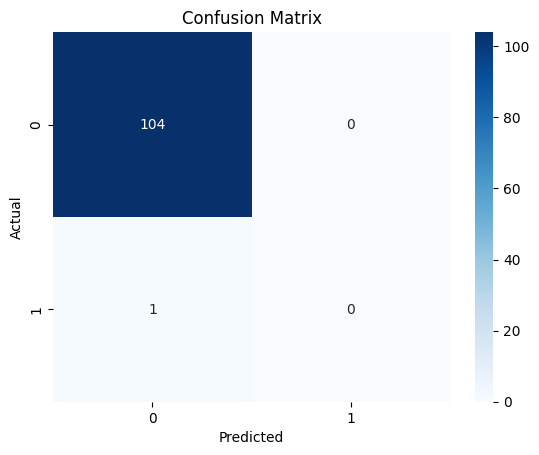

In [38]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

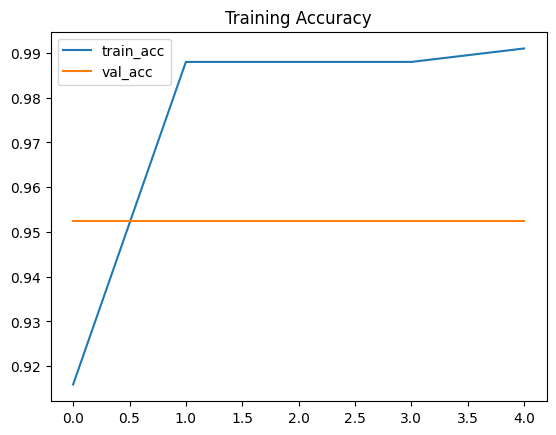

In [39]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title("Training Accuracy")
plt.show()


In [40]:
sample_texts = [
    "Heavy rain expected tomorrow across Chennai.",
    "It’s a hot and sunny day with no signs of clouds.",
    "Thunderstorms are likely in the evening."
]

seqs = tokenizer.texts_to_sequences(sample_texts)
pads = pad_sequences(seqs, maxlen=100, padding='post', truncating='post')
preds = (model.predict(pads) > 0.5).astype("int32")

for text, pred in zip(sample_texts, preds):
    print(f" {text} → {' Rain' if pred == 1 else ' No Rain'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
 Heavy rain expected tomorrow across Chennai. →  No Rain
 It’s a hot and sunny day with no signs of clouds. →  No Rain
 Thunderstorms are likely in the evening. →  No Rain


**APPROACH 2**

In [42]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# --- 1. Data Preparation and Feature Engineering ---

# Load the dataset
df = pd.read_csv("/content/project 2 climate.csv")

# Drop rows with missing text (comments)
df.dropna(subset=['text'], inplace=True)

# Create the hypothetical target variable 'mentions_rain'
df['text_lower'] = df['text'].astype(str).str.lower()
# Define all rain-related keywords
weather_keywords = r'rain|raining|precipitation|storm|wet|flood|deluge|thunderstorm|thunderstorms'
df['mentions_rain'] = df['text_lower'].str.contains(weather_keywords, regex=True).astype(int)

# Handle missing values in commentsCount by filling with 0
df['commentsCount'].fillna(0, inplace=True)

# Define features (X) and target (y)
X_text = df['text']
X_num = df[['likesCount', 'commentsCount']]
y = df['mentions_rain']

# Split data into training and testing sets
X_text_train, X_text_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
    X_text, X_num, y, test_size=0.3, random_state=42, stratify=y
)

# Feature Engineering: Vectorize text using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_text_train_vec = tfidf.fit_transform(X_text_train)
X_text_test_vec = tfidf.transform(X_text_test)

# Combine features: Text vectors (converted to dense array) and numerical features
X_train_combined = np.hstack([X_text_train_vec.toarray(), X_num_train.values])
X_test_combined = np.hstack([X_text_test_vec.toarray(), X_num_test.values])


# --- 2. Model Training ---

# Use Logistic Regression with class_weight='balanced' to handle imbalance
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train_combined, y_train)

# --- 3. Prediction Function with Custom Threshold ---

def predict_rain_mention_custom_threshold(comment, likes, comments, model, tfidf_vectorizer, threshold=0.15):
    """
    Predicts whether a comment mentions rain using a custom probability threshold.

    Args:
        comment (str): The text of the comment.
        likes (int/float): The number of likes.
        comments (int/float): The number of comments.
        model: The trained scikit-learn model.
        tfidf_vectorizer: The fitted TfidfVectorizer object.
        threshold (float): The probability threshold for classifying as "Rain Mention".

    Returns:
        str: "Rain Mention" or "No Rain Mention".
    """
    # 1. Prepare features
    text_vec = tfidf_vectorizer.transform([comment]).toarray()
    num_features = np.array([[likes, comments]])
    combined_features = np.hstack([text_vec, num_features])

    # 2. Predict probability for class 1 (Rain Mention)
    prob_class_1 = model.predict_proba(combined_features)[0][1]

    # 3. Apply custom threshold
    prediction = 1 if prob_class_1 >= threshold else 0

    return "Rain Mention" if prediction == 1 else "No Rain Mention"

# --- 4. Example Usage ---

# Set the desired threshold for better Recall
prediction_threshold = 0.15

# Example 1: Expected to be Rain Mention
comment_1 = "Heavy rain expected tomorrow across Chennai."
result_1 = predict_rain_mention_custom_threshold(comment_1, likes=5, comments=2, model=model, tfidf_vectorizer=tfidf, threshold=prediction_threshold)
print(f"Comment: '{comment_1}' -> Predicted: {result_1}")

# Example 2: Expected to be No Rain Mention
comment_2 = "It’s a hot and sunny day with no signs of clouds."
result_2 = predict_rain_mention_custom_threshold(comment_2, likes=10, comments=1, model=model, tfidf_vectorizer=tfidf, threshold=prediction_threshold)
print(f"Comment: '{comment_2}' -> Predicted: {result_2}")

# Example 3: Expected to be Rain Mention
comment_3 = "Thunderstorms are likely in the evening."
result_3 = predict_rain_mention_custom_threshold(comment_3, likes=3, comments=0, model=model, tfidf_vectorizer=tfidf, threshold=prediction_threshold)
print(f"Comment: '{comment_3}' -> Predicted: {result_3}")
comment_4 = "I think rain may come today."
result_4 = predict_rain_mention_custom_threshold(comment_4, likes=3, comments=0, model=model, tfidf_vectorizer=tfidf, threshold=prediction_threshold)
print(f"Comment: '{comment_4}' -> Predicted: {result_4}")

/tmp/ipython-input-902903560.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['commentsCount'].fillna(0, inplace=True)


Comment: 'Heavy rain expected tomorrow across Chennai.' -> Predicted: Rain Mention
Comment: 'It’s a hot and sunny day with no signs of clouds.' -> Predicted: No Rain Mention
Comment: 'Thunderstorms are likely in the evening.' -> Predicted: Rain Mention
Comment: 'I think rain may come today.' -> Predicted: Rain Mention


In [44]:
text_feature_names = tfidf.get_feature_names_out().tolist()
all_feature_names = text_feature_names + ['likesCount', 'commentsCount']
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
})

/tmp/ipython-input-229393137.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=plot_df, palette='RdBu')


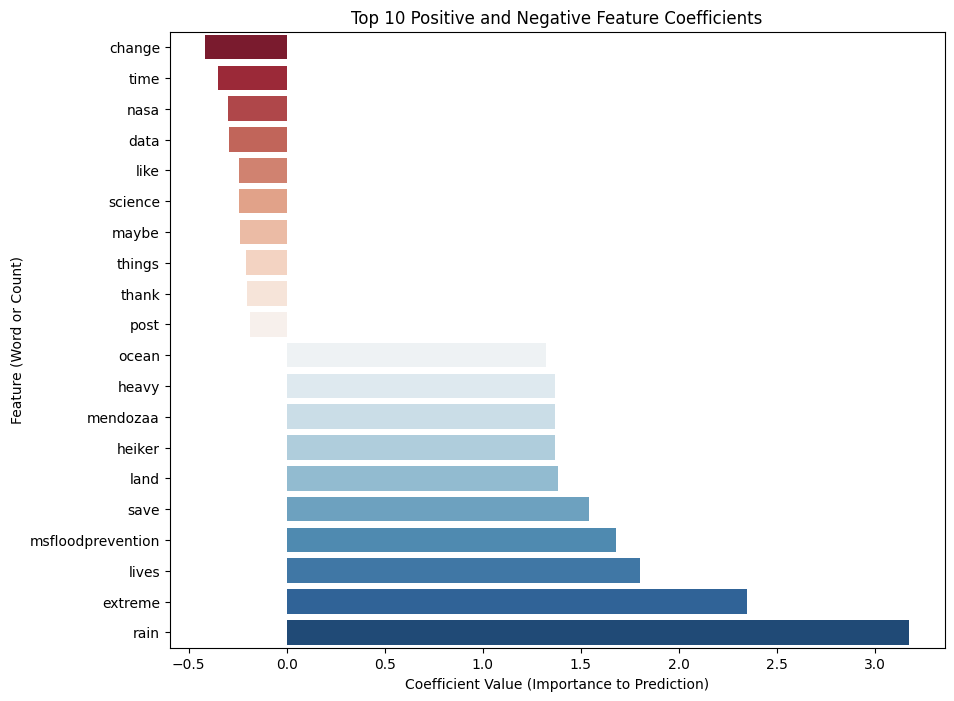

In [45]:
top_pos = feature_importance.sort_values(by='Coefficient', ascending=False).head(10)
top_neg = feature_importance.sort_values(by='Coefficient', ascending=False).tail(10)
plot_df = pd.concat([top_pos, top_neg]).sort_values(by='Coefficient', ascending=True)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=plot_df, palette='RdBu')
plt.title('Top 10 Positive and Negative Feature Coefficients')
plt.xlabel('Coefficient Value (Importance to Prediction)')
plt.ylabel('Feature (Word or Count)')
plt.savefig('feature_importance.png')


--- Classification Report with Custom Threshold (0.15) ---
                     precision    recall  f1-score   support

No Rain Mention (0)       0.99      0.57      0.73       148
   Rain Mention (1)       0.05      0.75      0.09         4

           accuracy                           0.58       152
          macro avg       0.52      0.66      0.41       152
       weighted avg       0.96      0.58      0.71       152



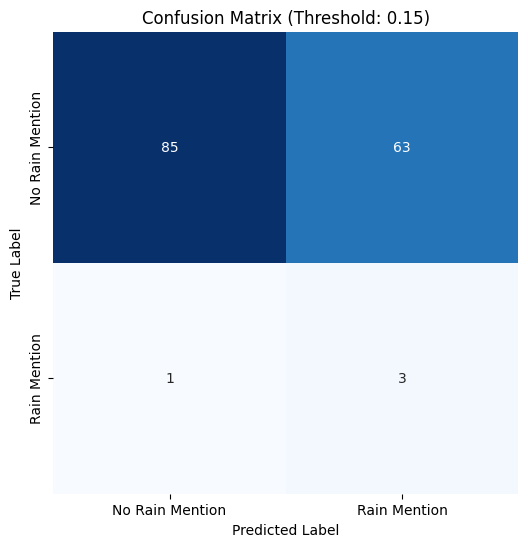

In [48]:
y_proba = model.predict_proba(X_test_combined)[:, 1]
custom_threshold = 0.15
y_pred_tuned = (y_proba >= custom_threshold).astype(int)
print(f"\n--- Classification Report with Custom Threshold ({custom_threshold}) ---")
print(classification_report(y_test, y_pred_tuned, target_names=['No Rain Mention (0)', 'Rain Mention (1)'], zero_division=0))

cm = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain Mention', 'Rain Mention'],
            yticklabels=['No Rain Mention', 'Rain Mention'])
plt.title(f'Confusion Matrix (Threshold: {custom_threshold})')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix.png')